<a href="https://colab.research.google.com/github/Lucia1009/TFG-Plataforma-para-la-prediccion-de-potencia-electrica-generada-en-parques-eolicos/blob/desarrollo/modelos/Efecto_sombra_vs_yaw_ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive

### Tratamiento de datos

In [ ]:
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/TFG/elvalle_reparto_saltos_sp75.csv', delimiter=";",decimal=".",skiprows = [1])

# df=pd.read_csv('/content/elvalle_reparto_saltos_sp35.csv', delimiter=";",decimal=".",skiprows = [1])


Mounted at /content/drive


In [ ]:
df_filtrado=df[(df['TIME'] % 600==540)]
print(df_filtrado.shape)
print(df.shape)

for col in df_filtrado:
    print("\n",col, "\n", df_filtrado[col].unique())

(21600, 150)
(216000, 150)

 TIME 
 [     540     1140     1740 ... 12958740 12959340 12959940]

 TC1.T.Pg.signal[1] 
 [-7.23160006e-029  2.45985037e-042  1.68092249e-059 ... -1.17359672e-122
 -1.41680844e-134  1.93146925e-148]

 TC2.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ...  1.15310843e-154
  1.39207424e-166 -1.89775026e-180]

 TC3.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ... -2.55237331e-098
 -3.08131745e-110  4.20061720e-124]

 TC4.T.Pg.signal[1] 
 [-5.55890468e-29  1.89087804e-42  1.29211901e-59 ...  6.19753520e-59
  7.48188880e-71 -1.01997121e-84]

 TC5.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ... -7.15127858e-115
 -8.63328234e-127  1.17693535e-140]

 TC6.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ...  1.15310843e-154
  1.39207424e-166 -1.89775026e-180]

 TC7.T.Pg.signal[1] 
 [-5.55890468e-29  1.89087804e-42  1.29211901e-59 ...  1.02719523e-66
  1.24006726e-78 -1.690526

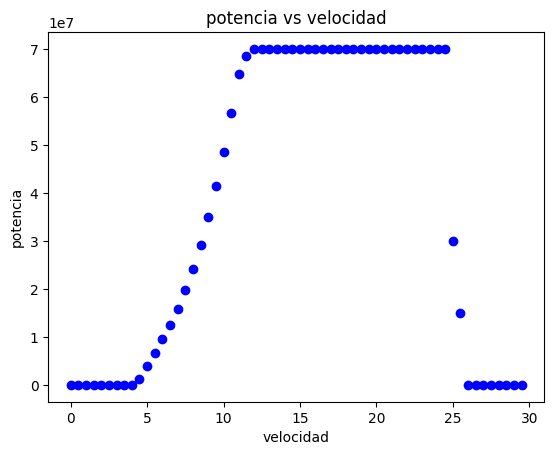

360


In [ ]:
# unique_wd, counts = np.unique(df_filtrado['wd'], return_counts=True)
# print(counts, "\n", unique_wd )

direcciones={}
for i in range(0,360):
    # Separo los datos para cada dirección
    filtered_data = df_filtrado[(df_filtrado['wd'] <= i+0.1) & (df_filtrado['wd'] > (i - 1 + 0.1))]

    # Selecciono solo las columnas que me interesan
    selected_columns = filtered_data[['ws', 'WF_Power', 'wd']]

    direcciones[i]=selected_columns
    # print(i, direcciones[i])

plt.title("potencia vs velocidad")
plt.scatter(direcciones[1]['ws'], direcciones[1]['WF_Power'], color="blue")

plt.xlabel("velocidad")
plt.ylabel("potencia")
plt.show()
print(len(direcciones))

In [ ]:
orientado=df_filtrado[ (df_filtrado['wd'] - df_filtrado['TC1.T.yaw_ref'] <= 1 + 0.01) & (df_filtrado['wd'] - df_filtrado['TC1.T.yaw_ref'] >= 1 - 0.01) ][['ws', 'wd', 'TC1.T.yaw_ref', 'WF_Power']]
desorientado = df_filtrado[ (df_filtrado['wd'] - df_filtrado['TC1.T.yaw_ref'] <= 10 + 0.01) & (df_filtrado['wd'] - df_filtrado['TC1.T.yaw_ref'] >= 10 - 0.01) ][['ws', 'wd', 'TC1.T.yaw_ref', 'WF_Power']]
print(orientado.head(5))
print(orientado['wd'].unique(), "\n")

orientado = orientado.drop(orientado[(orientado['wd'] <= 1 + 0.1) & (orientado['wd'] >= 1 - 0.1)].index)
orientado=orientado.drop(orientado[(orientado['wd'] <= 11 + 0.1) & (orientado['wd'] >= 11 - 0.1)].index)
print(orientado.head(5))
print(orientado['wd'].unique(), "\n")

print(desorientado.head(5))
print(desorientado['wd'].unique(), "\n")
desorientado = desorientado.drop(desorientado[(desorientado['wd'] <= 10 + 0.1) & (desorientado['wd'] >= 10 - 0.1)].index)
print(desorientado.head(5))
print(desorientado['wd'].unique())

               ws   wd  TC1.T.yaw_ref       WF_Power
609  1.021606e-07  1.0            0.0   1.110800e-30
619  4.999997e-01  1.0            0.0   1.271099e-44
629  1.000000e+00  1.0            0.0  3.776829e-114
639  1.500000e+00  1.0            0.0  1.958276e-128
649  2.000000e+00  1.0            0.0  1.919616e-140
[  1.   1.  11.  21.  31.  41.  51.  61.  71.  81.  91. 101. 111. 121.
 131. 141. 151. 161. 171. 181. 191. 201. 211. 221. 231. 241. 251. 261.
 271. 281. 291. 301. 311. 321. 331. 341. 351.] 

                 ws    wd  TC1.T.yaw_ref       WF_Power
12609  2.897760e-07  21.0           20.0   3.658770e-53
12619  5.000000e-01  21.0           20.0  -7.582921e-83
12629  1.000000e+00  21.0           20.0  7.081070e-118
12639  1.500000e+00  21.0           20.0 -2.055189e-135
12649  2.000000e+00  21.0           20.0 -8.667929e-156
[ 21.  31.  41.  51.  61.  71.  81.  91. 101. 111. 121. 131. 141. 151.
 161. 171. 181. 191. 201. 211. 221. 231. 241. 251. 261. 271. 281. 291.
 301. 311. 32

# Gráfica con las turbinas orientadas frente a las turbinas desorientadas

In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Orientado: ",
        dcc.Input(id='dir_1', value=21, type='number', step=10, min=21, max=351)
    ]),
    html.Div([
        "Desorientado: ",
        dcc.Input(id='dir_2', value=20, type='number',step=10, min=20, max=350, disabled=True)
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar comparación con la base', 'value': 'ver_base'}],
            value=[]
        )
    ]),
    html.Div([
        "Base: ",
        dcc.Input(id='base', value=20, type='number',step=10, min=20, max=350)
    ]),
    dcc.Graph(id='graph')
])

@app.callback(
    Output('dir_2', 'value'),
    Input('dir_1', 'value')
)
def update_dir2(dir1):
    return dir1 - 1


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('base', 'value'),
    Input('compara', 'value'))
def update_output_div(dir1, dir2, base, compara):

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=orientado[orientado['wd']==dir1]['ws'], y=orientado[orientado['wd']==dir1]['WF_Power'], marker=dict(color='blue'), name='Orientado'))
    fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==dir2]['ws'], y=desorientado[desorientado['wd']==dir2]['WF_Power'], marker=dict(color='red'), name='Desorientado'))

    if 'ver_base' in compara:
      fig.add_trace(go.Scatter(x=orientado[orientado['wd']==base+1]['ws'], y=orientado[orientado['wd']==base+1]['WF_Power'], marker=dict(color='green'), name='Orientado base'))
      fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==base]['ws'], y=desorientado[desorientado['wd']==base]['WF_Power'], marker=dict(color='purple'), name='Desorientado base'))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8060)


<IPython.core.display.Javascript object>

# Diferencias orientado vs desorientado

In [ ]:
diferencias_or_des = pd.DataFrame()

for i in range(20, 350, 10):

    potencia_or = orientado[orientado['wd'] == i+1]['WF_Power'].reset_index(drop=True)
    potencia_des = desorientado[desorientado['wd'] == i]['WF_Power'].reset_index(drop=True)

    diferencias_or_des[i] = potencia_or - potencia_des

######################################################################################################

app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Ángulo: ",
        dcc.Input(id='dir_1', value=20, type='number', step=10, min=20, max=350)
    ]),
    dcc.Graph(id='graph')
])


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'))
def update_output_div(dir1):

    # Crear figura base
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==dir1]['ws'], y=diferencias_or_des[dir1], marker=dict(color='blue'), name='Diferencias'))


    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Diferencia orientado vs desorientado'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8061)


<IPython.core.display.Javascript object>

# Gráfica para las distintas velocidades de las turbinas orientadas

In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Orientado 1: ",
        dcc.Input(id='dir_1', value=21, type='number', step=10, min=21, max=351)
    ]),
    html.Div([
        "Orientado 2: ",
        dcc.Input(id='dir_2', value=21, type='number', step=10, min=21, max=351)
    ]),
    dcc.Graph(id='graph')
])


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'))
def update_output_div(dir1, dir2):

    # Crear figura base
    fig = go.Figure()

    # Filter by 'wd' and select 'ws' and 'WF_Power'
    fig.add_trace(go.Scatter(x=orientado[orientado['wd']==dir1]['ws'], y=orientado[orientado['wd']==dir1]['WF_Power'], marker=dict(color='blue'), name='Orientado 1'))

    # Similar fix for desorientado DataFrame
    fig.add_trace(go.Scatter(x=orientado[orientado['wd']==dir2]['ws'], y=orientado[orientado['wd']==dir2]['WF_Power'], marker=dict(color='red'), name='Orientado 2'))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8062)


<IPython.core.display.Javascript object>

## Diferencias potencia para distintos ángulos

In [ ]:
base = 21
diferencias = pd.DataFrame()

for i in range(21, 351, 10):

    potencia_base = orientado[orientado['wd'] == base]['WF_Power'].reset_index(drop=True)
    potencia_comparacion = orientado[orientado['wd'] == i]['WF_Power'].reset_index(drop=True)

    diferencias[i] = potencia_base - potencia_comparacion

######################################################################################################

app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Orientado 1: ",
        dcc.Input(id='dir_1', value=21, type='number', step=10, min=21, max=351)
    ]),
    dcc.Graph(id='graph')
])


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'))
def update_output_div(dir1):

    # Crear figura base
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=orientado[orientado['wd']==dir1]['ws'], y=diferencias[dir1], marker=dict(color='blue'), name='Diferencias orientado'))


    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Diferencia'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8063)


<IPython.core.display.Javascript object>

# Gráfica para las distintas velocidades de las turbinas desorientadas

In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Desorientado 1: ",
        dcc.Input(id='dir_1', value=20, type='number', step=10, min=20, max=350)
    ]),
    html.Div([
        "Desorientado 2: ",
        dcc.Input(id='dir_2', value=20, type='number', step=10, min=20, max=350)
    ]),
    dcc.Graph(id='graph')
])


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'))
def update_output_div(dir1, dir2):


    fig = go.Figure()

    fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==dir1]['ws'], y=desorientado[desorientado['wd']==dir1]['WF_Power'], marker=dict(color='blue'), name='Desorientado 1'))

    fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==dir2]['ws'], y=desorientado[desorientado['wd']==dir2]['WF_Power'], marker=dict(color='red'), name='Desorientado 2'))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8064)


<IPython.core.display.Javascript object>

## Diferencias potencia para distintos ángulos

In [ ]:
base = 20
diferencias_des = pd.DataFrame()

for i in range(20, 350, 10):

    potencia_base_des = desorientado[desorientado['wd'] == base]['WF_Power'].reset_index(drop=True)
    potencia_comparacion_des = desorientado[desorientado['wd'] == i]['WF_Power'].reset_index(drop=True)

    diferencias_des[i] = potencia_base_des - potencia_comparacion_des

######################################################################################################

app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Desorientado 1: ",
        dcc.Input(id='dir_1', value=20, type='number', step=10, min=20, max=350)
    ]),
     html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar comparación con orientado', 'value': 'ver_orientado'}],
            value=[]
        )
    ]),

    dcc.Graph(id='graph')
])


@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('compara', 'value'))
def update_output_div(dir1, compara):

    # Crear figura base
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=desorientado[desorientado['wd']==dir1]['ws'], y=diferencias_des[dir1], marker=dict(color='blue'), name='Diferencias desorientado'))

    if 'ver_orientado' in compara:
      fig.add_trace(go.Scatter(x=orientado[orientado['wd']==dir1+1]['ws'], y=diferencias[dir1+1], marker=dict(color='red'), name='Diferencias orientado'))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Diferencia'
    )

    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8065)


<IPython.core.display.Javascript object>